# Bank Note

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
banknote_df = pd.read_csv("BankNote_Authentication.csv")

In [4]:
banknote_df.head(10)   # all fields except the target ("letter") are numeric. These will be scaled

,variance,skewness,curtosis,entropy,Class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [5]:
banknote_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variance    1372 non-null float64
skewness    1372 non-null float64
curtosis    1372 non-null float64
entropy     1372 non-null float64
Class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
banknote_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
curtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
Class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


In [7]:
banknote_df.shape

(1372, 5)

In [7]:
#X,y = np.array(banknote_df)[ :, 1:17], np.array(banknote_df.letter)[:]   

In [8]:
X = np.array(banknote_df)[ :, 0:3]
y = np.array(banknote_df)[:, 4]   
#y = np.array(banknote_df.letter)[:]   

In [28]:
X = banknote_df[['variance','skewness','curtosis','entropy']]
y = banknote_df[['Class']]
#y = np.array(banknote_df.letter)[:]   

In [29]:
X.shape

(1372, 4)

In [31]:
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [32]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [33]:
# Checking Unique
np.unique(y)

array([0, 1])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [35]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

# Linear Kernel

In [36]:
#C is complexity of the model. lower C value creates simple hyper surface while higher C creates complex surface

from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  

In [37]:
svclassifier.fit(X_train , y_train)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [16]:
#svclassifier.score(X_train, y_train)


In [38]:
y_pred = svclassifier.predict(X_test)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [40]:
print(accuracy_score(y_test,y_pred))

0.9878640776699029


In [41]:
print(confusion_matrix(y_test,y_pred))  


[[231   4]
 [  1 176]]


In [42]:
print(classification_report(y_test,y_pred)) 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       235
           1       0.98      0.99      0.99       177

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



#### NOTE: We should experiment with all the other kernels

# Sigmoid Kernel

In [44]:
svclassifier = SVC(kernel='sigmoid')  
svclassifier.fit(X_train, y_train)  

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [45]:
y_pred = svclassifier.predict(X_test)  

In [46]:
accuracy_score(y_test,y_pred)

0.7548543689320388

In [47]:

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[184  51]
 [ 50 127]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       235
           1       0.71      0.72      0.72       177

    accuracy                           0.75       412
   macro avg       0.75      0.75      0.75       412
weighted avg       0.76      0.75      0.75       412



# Poly Kernel

In [49]:
svclassifier = SVC(kernel='poly', degree=3) 
svclassifier.fit(X_train, y_train) 

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [50]:
y_pred = svclassifier.predict(X_test)  

In [51]:

accuracy_score(y_test,y_pred)

0.9805825242718447

In [52]:

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[227   8]
 [  0 177]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       235
           1       0.96      1.00      0.98       177

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



# Radial Basis Function Kernel

In [54]:
svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_train, y_train)  

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [55]:
y_pred = svclassifier.predict(X_test)  

In [56]:

accuracy_score(y_test,y_pred)

1.0

In [57]:

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[235   0]
 [  0 177]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       1.00      1.00      1.00       177

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



In [58]:
print(svclassifier.score(X_train,y_train))
print(svclassifier.score(X_test , y_test))

1.0
1.0


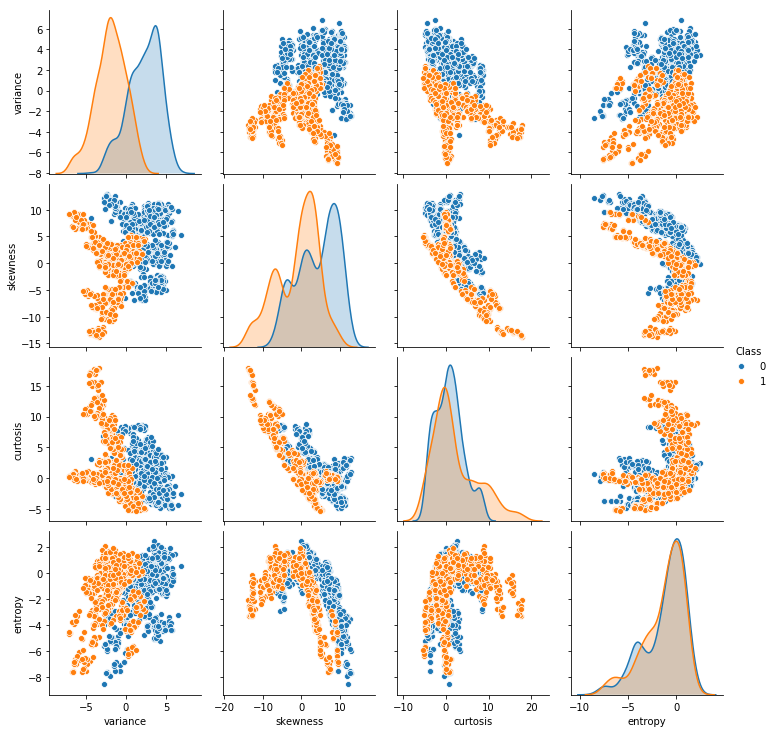

In [60]:
import seaborn as sns
sns.pairplot(banknote_df, hue = 'Class', diag_kind = 'kde')